#### Elementos finitos linear 1D

## Montar a matrix de massa

In [34]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [1/(b-a) -1/(b-a);-1/(b-a) 1/(b-a) ]

stiff_matrix (generic function with 1 method)

$\in$

In [35]:
Nel = 150
a = -1.0
b = 1.0
Ndof = Nel + 1
xn = [linspace(a,b,Nel+1);];
idx = 2:Ndof-1

2:150

In [36]:

dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map

2x150 Array{Int64,2}:
 1  2  3  4  5  6  7  8   9  10  11  12  …  144  145  146  147  148  149  150
 2  3  4  5  6  7  8  9  10  11  12  13     145  146  147  148  149  150  151

In [37]:

#diags
dl = zeros(Ndof-1)
dp = zeros(Ndof)

##
for e = 1:Nel
    dMe = stiff_matrix(xn[e], xn[e+1])
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            if kg == ig #principal
                dp[kg] += -dMe[k,i] + Me[k,i]
            end
            if kg == ig + 1 && kg > 1#low
                dl[kg-1] += -dMe[k,i] + Me[k,i]
            end
        end
    end
end

Tri_dM = SymTridiagonal(dp[2:end-1],dl[2:end-1]) 

149x149 SymTridiagonal{Float64}:
 -149.991     75.0022     0.0     …     0.0        0.0        0.0   
   75.0022  -149.991     75.0022        0.0        0.0        0.0   
    0.0       75.0022  -149.991         0.0        0.0        0.0   
    0.0        0.0       75.0022        0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0     …     0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0     …     0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    0.0        0.0        0.0           0.0        0.0        0.0   
    ⋮                             ⋱                                 
 

## Montar o lado direito da equação:

In [38]:
#wolfram problem : y'' + y = -4*pi^2*cos(2*pi*x) + cos(2*pi*x),y'(-1) = 0,y'(1)=0
fun(x) = (1.0 - 4*pi^2)*sin(2*pi*x) 
resp(x) = sin(2*pi*x)
    

resp (generic function with 1 method)

In [39]:
fe = fun(xn);

In [40]:
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end
        
F = F[idx];


## Solução do problema

In [41]:
u = Tri_dM\F ;

In [42]:
u = [0.0; u; 0.0];

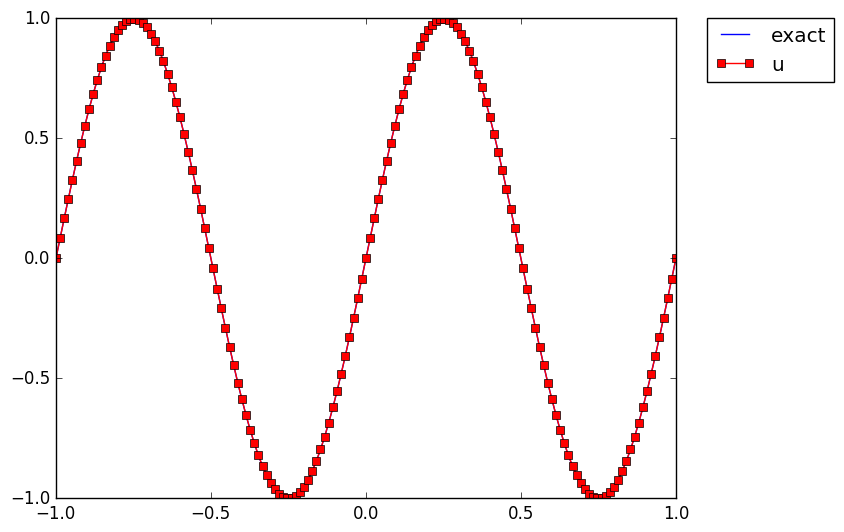

PyObject <matplotlib.legend.Legend object at 0x7f92b6e1e350>

In [43]:
using PyPlot
xx = linspace(a, b, 201)
plot(xx, resp(xx),label="exact")
plot(xn, u, "rs-",label = "u")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

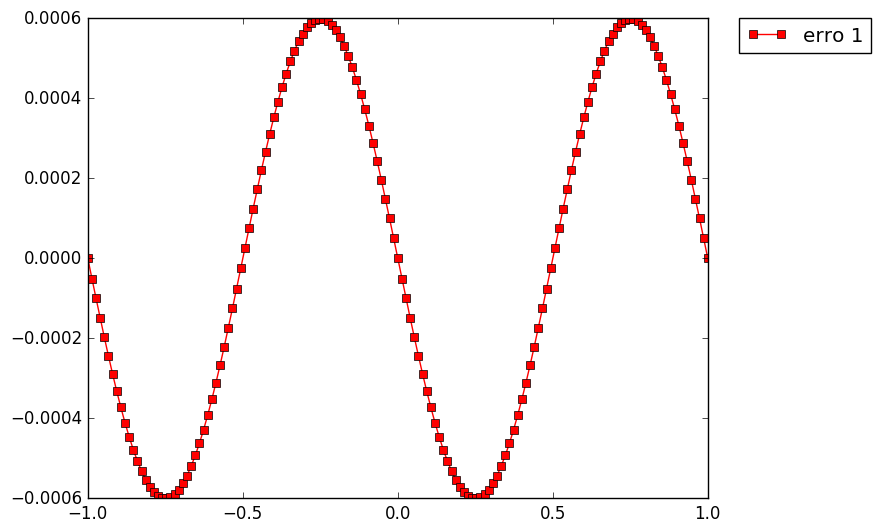

PyObject <matplotlib.legend.Legend object at 0x7f92b6dd9f10>

In [44]:
e1 = u - resp(xn)
figure()
plot(xn, e1, "rs-",label="erro 1")
legend()
maxabs(e1)
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [45]:
mean(e1)

7.151563444676304e-15

In [46]:
sum(e1.^2)

2.6986099450765855e-5

In [47]:
var(e1)

1.7990732967177238e-7